In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python Smartkower/Minor Project/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
s=df['diagnosis'].value_counts()
s

B    357
M    212
Name: diagnosis, dtype: int64

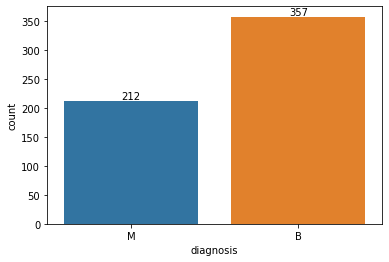

357

In [ ]:
graph = sns.countplot(x='diagnosis',data=df)
i= 'M'
for p in graph.patches:
  height=p.get_height()
  width=p.get_width()
  graph.text(p.get_x()+width/2,height+3,s[i],ha='center')
  i = 'B'
plt.show()
height

In [ ]:
df.shape

(569, 33)

In [ ]:
x = df.iloc[:,2:32].values
y = df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 50)

In [ ]:
x_train.shape

(426, 30)

In [ ]:
x_test.shape

(143, 30)

In [ ]:
# k = sqrt(426) = 20.6 = 21

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=21,metric = 'euclidean')

In [ ]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M'],
      dtype=object)

In [ ]:
y_test

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.972027972027972

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[88,  2],
       [ 2, 51]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98        90
           M       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

